In [1]:

!pip -q install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/data
!unzip -o /content/data/imdb-dataset-of-50k-movie-reviews.zip -d /content/data

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.07GB/s]
Archive:  /content/data/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/data/IMDB Dataset.csv  


In [3]:

import pandas as pd

df = pd.read_csv("/content/data/IMDB Dataset.csv")
print(df.head())
print(df["sentiment"].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)   # remove HTML tags
    text = re.sub(r"[^a-z\s]", " ", text)  # keep only letters
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df["cleaned"] = df["review"].apply(clean_text)
print(df["cleaned"].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    one reviewers mentioned watching oz episode ho...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: cleaned, dtype: object


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned"])
y = df["sentiment"].map({"positive": 1, "negative": 0})

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



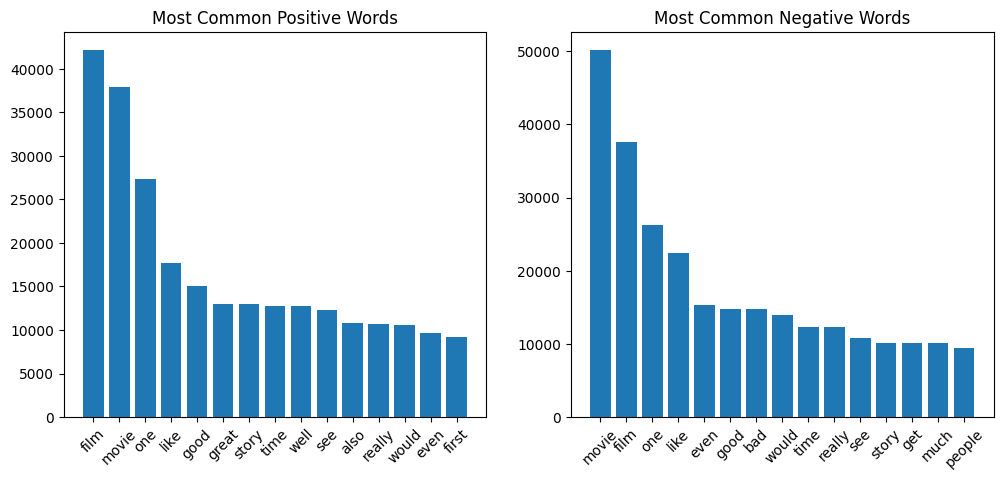

In [7]:

from collections import Counter
import matplotlib.pyplot as plt


pos_words = " ".join(df[df["sentiment"]=="positive"]["cleaned"]).split()
neg_words = " ".join(df[df["sentiment"]=="negative"]["cleaned"]).split()

pos_counts = Counter(pos_words).most_common(15)
neg_counts = Counter(neg_words).most_common(15)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(*zip(*pos_counts))
plt.title("Most Common Positive Words")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(*zip(*neg_counts))
plt.title("Most Common Negative Words")
plt.xticks(rotation=45)

plt.show()